### SVM(Support Vector Machines)


<img src='./images/28.머신러닝_지도학습_3_SVM_01.png' weight = 400 height = 400>


`서포트백터머신`은 분류문제에 사용할 수 있는 강력한 머신러닝 지도학습 모델이다. `SVM`은 
`결정경계(Decision Boundary)`즉 분류를 위한 기준선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류문제를 수행할 수 있게 된다.
<img src='./images/28.머신러닝_지도학습_3_SVM_02.png' weight = 400 height = 400>
<img src='./images/28.머신러닝_지도학습_3_SVM_03.png' weight = 400 height = 400>
##### 1. 개요

* Boser, Guyon 및 Vapnik에 의해 1992년에 제안된 이후, 1990년대 후반부터 현재까지 학계와 업계(주로 미국 및 유럽선진국)에서 활발하게 활용되고 있는 예측기법
* 기계학습의 분야 중 하나로 패턴인식, 자료분석을 위한 지도학습문제
* 주로 분류와 회귀분석을 위해 사용
* 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어 졌을 때 새로운 데이터가 어느 카테고리에 속할지 판단하는 기준으로 가장 큰 폭을 가진 경계를 찾는 알고리즘


##### 2. 장점

* 선형분류뿐 아니라 비선형분류도 가능 - 2차원을 3차원으로 늘린다음 단면으로 분리
* 모델을 만들 때 고려해야할 파라미터가 많지 않음
* 적은 양의 데이터로도 모델을 만들 수 있다. 
* 딥러닝 이전에는 분류모델중에서 가장 기술좋다고 평가

##### 3. 적용분야

* 문서분류
* 안면인식, 주차인식
* 주가예측
* 부도예측
* 고객구매예측
* 채권등급평가예측

##### 4. 커널서포트 벡터 머신(Kernulized Support Vector Machin)

`커널 서포트 벡터 머신(SVM)`은 입력 데이터에서 단순한 `초평면 Hyperplane`은 정의 되지 않는
복잡한 모델을 만들 수 있도록 확장한 것이다. SVM은 분류와 회귀에 모두 사용할 수 있다.
직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형모델이 매우 제한적이다. 선형모델을 유연하게 만드는 한가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것이다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

import mglearn
from sklearn.datasets import make_blobs

from sklearn.svm import LinearSVC

from mpl_toolkits.mplot3d import Axes3D, axes3d

from sklearn.svm import SVC

from sklearn import datasets 

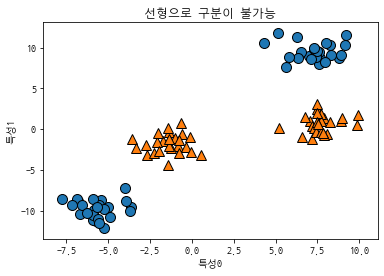

In [128]:
# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋
# sklearn.datasets make_blobs 데이터셋을 이용 - 등방성가우스모양?
import mglearn
from sklearn.datasets import make_blobs

# centers = 타켓(y)값의 종류수를 결정하는 옵션 
# ex) centers = 4 -> y = 0,1,2,3
x, y = make_blobs(centers=4, random_state=8)
y = y%2 # label을 0과 1로 설정

mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.title('선형으로 구분이 불가능')
plt.show()

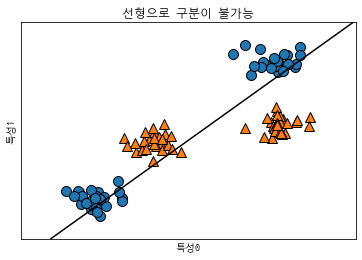

In [19]:
from sklearn.svm import LinearSVC

liner_svm = LinearSVC().fit(x,y)
# 모델을 기준으로 분류하는 직선을 그림
mglearn.plots.plot_2d_separator(liner_svm, x)
# 직선에 위에서 만든 산점도를 넣어서 분류를 시각화
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.title('선형으로 구분이 불가능')
plt.show()

# 분류를 위한 선형모델을 위한 svm은 직선으로만 데이터 포인트를 나눌 수 있다.
# 커널로 늘리지 않은 2차원의 svm으로는 제대로된 분리가 불가능

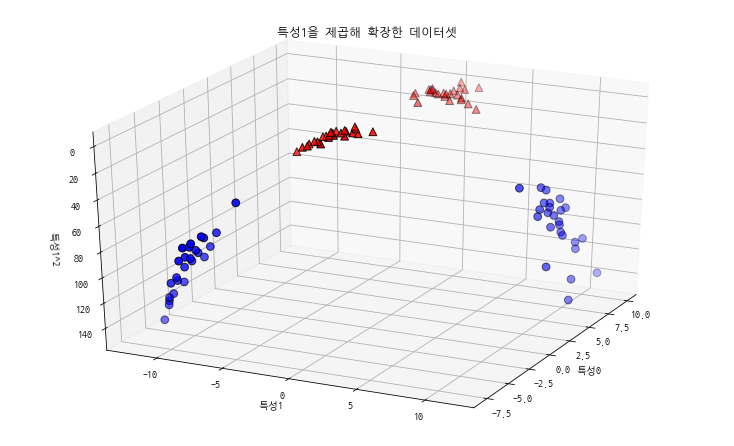

In [96]:
# 두 번쨰 특성에다 제곱을 한 '특성1**2' 값을 새오룬 특성으로 투가해서 입력특성을
# 2차원데이터가 아니라 특성0,특성1,특성2의 3차원 데이터로 만듬
# 산점도로 표현

# 3차원을 그리는 모듈
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure(figsize=(10,6))

# 두번째 특성을 제곱하여 새로운 특성을 추가

# x_new = x**2 를 하면 이 후에 일부 슬라이싱 해서 붙여야함
# np.hstack을 하면 어레이에 새로운 변수를 추가하는데 용의하다.
# 변수를 어레이의 오른쪽에 붙이는 함수, 아래는 vstack
# 기존의 변수중 하나에만 제곱하는 이유는 한개의 그룹만 위로 올리기 위해서인듯?

x_new = np.hstack([x,x[:,1:]**2])
# x_new

ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0 -> y가 0 즉 false인 것을 true로 변환해서 가져옴
mask = y == 0
# mask

# y값이 0인 변수1,2,3의 값을 호출해서 3차원으로 그림
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2], c = 'b', cmap = mglearn.cm2,
          s = 60, edgecolor = 'k')


# ~는 반대의 의미 -> y=1 를 호출
ax.scatter(x_new[~mask,0],x_new[~mask,1],x_new[~mask,2], c = 'r', cmap = mglearn.cm2,
             s = 60, edgecolor = 'k', marker = '^')

ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1^2')
ax.set_title('특성1을 제곱해 확장한 데이터셋')

plt.show()

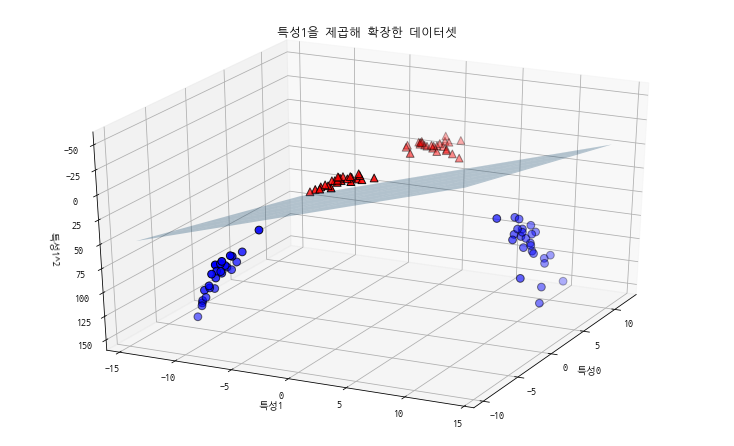

In [70]:
# 새로운 데이터셋(X_new)에서는 선형모델과 3차원 공간의 평면을 이용해서
# 데이터셋을 분류하기
# 차원을 확장한 x_new를 통해서 훈련
# ravel() 해당 변수의 값을 의미

liner_svm_3d = LinearSVC().fit(x_new,y)
coef, intercept = liner_svm_3d.coef_.ravel(),liner_svm_3d.intercept_.ravel()

# 경계 그리기
figure = plt.figure(figsize=(10,6))
ax = Axes3D(figure, elev=-152, azim=-26)

# 초평면으로 자르기 위해서 x,y,z값을 linspace로 범위를 만듬
xx = np.linspace(x_new[:,0].min()-2, x_new[:,0].max()+2)
yy = np.linspace(x_new[:,1].min()-2, x_new[:,1].max()+2)

# np.meshgrid = (0,1) (2,3) 의 두 어레이를 0,2 0,3 1,2 1,3 형식으로 하나씩 묵어주는 함수
# 이 경우 3차원이기 때문에 한 XX값이 가지는 YY값이 2차원일수 밖에 없다.,
# 그래서 XX값 하나마다 모든 YY값을 넣어주는 과정을 넣어준것
XX, YY = np.meshgrid(xx,yy)

# 제곱한 만큼 뻄 - coef[2]가 -이기 때문에 -를 붙여준듯?
ZZ = (coef[0] * XX + coef[1]*YY + intercept)/-coef[2] 


# 초평면그리기
ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha = 0.3)

mask = y == 0
# mask

# y값이 0인 변수1,2,3의 값을 호출해서 3차원으로 그림
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2], c = 'b', cmap = mglearn.cm2,
          s = 60, edgecolor = 'k')


# ~는 반대의 의미 -> y=1 를 호출
ax.scatter(x_new[~mask,0],x_new[~mask,1],x_new[~mask,2], c = 'r', cmap = mglearn.cm2,
             s = 60, edgecolor = 'k', marker = '^')

ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1^2')
ax.set_title('특성1을 제곱해 확장한 데이터셋')

plt.show()

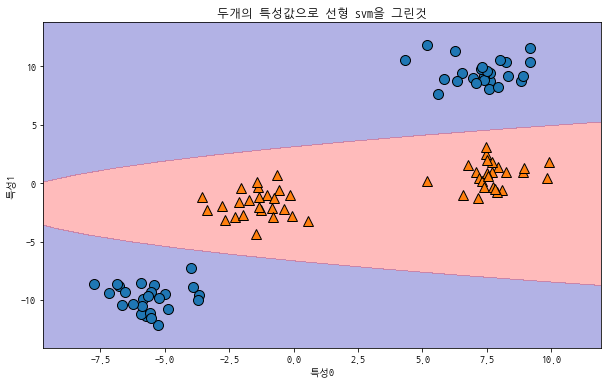

In [91]:
# 원래 특성을 살펴보면 상기의 셀에서의 선형SVM모델은 더 이상 선형이 아니다.
# 직선보다는 타원에 가까운 형태의 비선형모델이다. 따라서 비선형의 모습을 그리기
figure = plt.figure(figsize=(10,6))

ZZ = YY ** 2
dec = liner_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

# contourf : 윤곽
# 3차원값을 다시 1차원 값으로 변환
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(),0,dec.max()],
            cmap=mglearn.cm2, alpha=0.3)

mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.title('두개의 특성값으로 선형 svm을 그린것')
plt.show()

#### 커널기법

https://bskyvision.com/163

데이터셋에 비선형특성을 추가하여 선형모델을 강력하게 만들었지만 대다수의 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하게 되면 연산코스트의 증가 한다. 이런 것은 수학적인 기법을 사용해서 새로운 특성을 많이 만들지 않고 고차원에서 분류기를 학습시킬 수가 있다.

이런 수학적인 방법을 `커널기법 Kernel trick`이라고 하며 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(더 정확히는 스칼라곱)를 계산한다.

SVM에서는 데이터를 고차원공간에 매핑하는데 많이 사용하는 방법은 2가지이다.

1. 다항식 커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산하는 방법

2. `가우시안 Gaussian`커널로 불리는 `RBF Radial Basis Function` :사우시안 커널은 차원이 무한한 특성공간에 매핑하는 것으로 모든 차수의 모든 다항식을 고려한다. 하짐나 특성의 중요도는 고차원이 될수록 줄어든다.


#### SVM이해하기

일반적으로 훈련데이터의 일부만 결정경계를 만드는 데 영향을 준다. 바로 두 클래스사이의 경계에 위치한 데이터 포인트를 `서포트벡터 Support Vector` 라고 한다.

새로운 데이터 포인트에 대해 예측하려면 각 서포트벡터의 거리를 측정하는데 분류결정은 `서포트 벡터까지의 거리`에 기반하며 서포트 벡터의 중요도는 훈련과정에서 학습한다. 이 값은 `SVM객체의 dual_coef_ `속성에 저장된다. 데이터포인트 사이의 거리는 `가우시안커널`에 의해 계산된다.

$$K_{rbf}(x1,x2) = exp(-\gamma\|x1 - x2\|^2)$$ 

여기에서 $x1$과 $x2$는 데이터포인터이며 $\|x1 - x2\|$는 유클리디안 거리이고 $\gamma$는 가우시안 커널의 폭을 제어하는 매개변수이다.

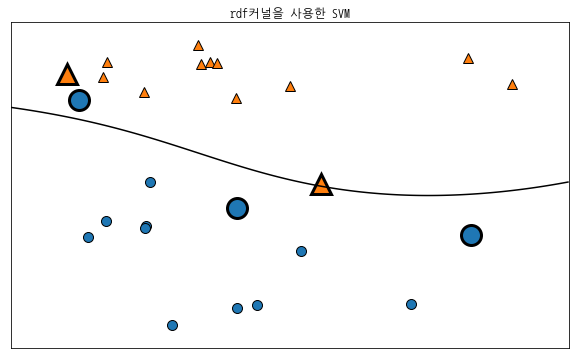

In [130]:
# SVM실습
# handcrafted 데이터셋으로 SVM학습시키기 make_handcrafted_dataset
from sklearn.svm import SVC

figure = plt.figure(figsize=(10,6))

x,y = mglearn.tools.make_handcrafted_dataset()

# 데이터포인트의 산점도
mglearn.discrete_scatter(x[:,0],x[:,1],y)

# 기계학습
# c는 마진의 범위를 늘린다고 생각되고 (c값이 높으면 이상치의 가능성을 낮다고 보기 때문)
# gamma는 마진의 곡률을 높인다고 생각하면 될듯
svm = SVC(kernel='rbf', C= 10, gamma = 0.1).fit(x,y)
mglearn.plots.plot_2d_separator(svm, x, eps=0.5)

# 서포트벡트의 값 구하기
sv = svm.support_vectors_

# dual_coef_의 값에 의해 서포트벡터의 클래스레이블(정답)이 결정
sv_laels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_laels, s =20 ,markeredgewidth=3)
plt.title('rdf커널을 사용한 SVM')
plt.show()

# 결과분석
# 2개의 클래스의 2차원 데이터셋에 서포트벡터머신을 학습시킨 결과로 결정경계는 검은 실선
# SV는 굵은 테두리, 아래 그래프의 결과는 SVM에서는 직선이 아니라 부드러운 비선형 경계를 만듬

#### SVM 매개변수 튜닝

* SVC의 C=10 변수와 gamma = 0.1
- gamma : $\gamma$값으로 가우시안커널폭의 역수를 의미한다. gamma매개변수가 하나의 훈련풀에
    미치는 영향의 범위를 결정한다. 값이 작을수록 넓은 영역을 의미한다. 즉, 가우시안 커널의 반경이 클수록 훈련샘플의 영향도 커진다.
    
- c변수 : 선형모델에서 사용한 것과 비슷한 규제 매개변수이다.. 이 변수는 각 포인트의 중요도(정확히는 dual_coef_값)를 제한한다.

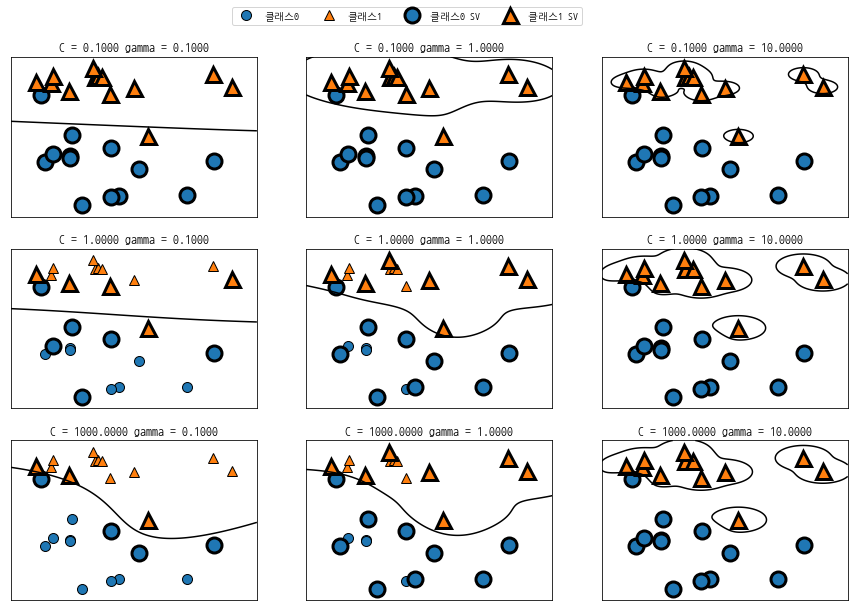

In [136]:
# 매개변수 gamma와 c값의 변경에 따른 변화 보기
# 즉, c와 gamma값에 따라서 결정경계와 서포트벡터가 결정된다.

fig, axes = plt.subplots(3,3,figsize=(15,10)) 

for ax, c in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C = c , log_gamma=gamma,ax= a) 
        
        
axes[0,0].legend(['클래스0','클래스1','클래스0 SV','클래스1 SV'], ncol=4, loc=(.9,1.2))
plt.show()


# 결과분석

# gamma값을 0.1, 1, 10으로 증가 : 값이 커질수록 선의 곡률이 높아짐
# C값을 0.1,1,1000으로 증가 : c값의 증가에 따라 포인트들이 모델에 큰 영향을 주며 결정
# 경계를 휘어서 정확하게 분류

#### SVM을 위한 데이터 전처리

데이터특성들의 값에 따라 그 값들의 범위가 완전히 다를 경우에 이 것이 커널 svm에서 큰 영향을 주게된다. 이를 해결하기 위해서 특성 값들의 범위가 비슷해지도록 조정하는 것이다.
커널SVM에서는 `0~1 사이의 값으로 전처리`하게 된다.



### 실습 1. 유방암데이터셋

In [149]:
# RBF커널 SVM을 유방암데이터 셋에 적용

from sklearn import datasets
cancer = datasets.load_breast_cancer()

print('cancer.key: {}'.format(cancer.keys()))
print('cancer 데이터 형태: {}'.format(cancer.data.shape))

# 악성 212, 양성 357

print('클래스별 샘플 갯수 : {}'.format({n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target)) }))
print('특성의 이름 : ', cancer.feature_names)


cancer.key: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
cancer 데이터 형태: (569, 30)
클래스별 샘플 갯수 : {'malignant': 212, 'benign': 357}
특성의 이름 :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [214]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=10, gamma=0.01).fit(x_train, y_train)
print('훈련점수 : {:.3f}'.format(svm.score(x_train, y_train)))
print('검증점수 : {:.3f}'.format(svm.score(x_test, y_test)))

훈련점수 : 1.000
검증점수 : 0.622


In [166]:
# 2. RandomForest로 기계학습
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=0).fit(x_train, y_train)
print('훈련점수 : {:.3f}'.format(forest.score(x_train, y_train)))
print('검증점수 : {:.3f}'.format(forest.score(x_test, y_test)))

훈련점수 : 1.000
검증점수 : 0.972


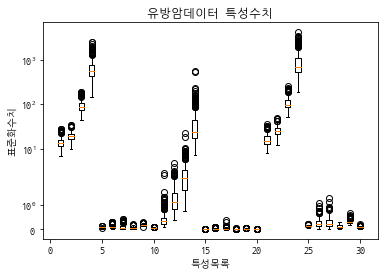

In [173]:
# 과적합화를 개선
# 특성값의 범위를 표준화
# plt.yscale value : {"linear", "log", "symlog", "logit", ...}
plt.boxplot(x_train, manage_ticks=False)
plt.yscale('symlog') # 표준화
plt.xlabel('특성목록')
plt.ylabel('표준화수치')
plt.title('유방암데이터 특성수치')
plt.show()

특성별최소값 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별최대값 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


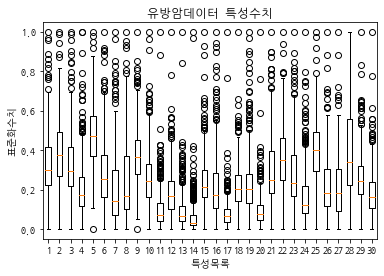

In [186]:
# 각 특성치의 값들을 표준화 처리
# 특성마다 서로 다른 단위문제를 해결하기 위해서 데이터를 전처리 즉, 0~1 사이의 값으로 표준화
# minmax방식

# 학습용 데이터셋에서 특성별로 최소값 계산
# 각 변수마다 최소값 추출
min_on_training = x_train.min(axis = 0)
range_on_traing = (x_train -min_on_training).max(axis=0)

# 학습용데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해서 최소값0 , 최대값 1로 표준화
x_traing_scaled = (x_train -min_on_training)/(range_on_traing)
x_traing_scaled

print('특성별최소값 : {}'.format(x_traing_scaled.min(axis = 0)))
print('특성별최대값 : {}'.format(x_traing_scaled.max(axis = 0)))

plt.boxplot(x_traing_scaled, manage_ticks=False)

plt.xlabel('특성목록')
plt.ylabel('표준화수치')
plt.title('유방암데이터 특성수치')
plt.show()

In [195]:
def minmax(data):
    min_on_training = data.min(axis = 0)
    range_on_traing = (data -min_on_training).max(axis=0)
    traing_scaled = (data -min_on_training)/(range_on_traing)
    
    return traing_scaled

x_test_scaled = minmax(x_test)

In [212]:
svc = SVC().fit(x_traing_scaled,y_train)
print('훈련점수 : {:.3f}'.format(svc.score(x_traing_scaled, y_train)))
print('검증점수 : {:.3f}'.format(svc.score(x_test_scaled, y_test)))

훈련점수 : 0.984
검증점수 : 0.909


In [210]:
# SVM의 매개변수 (C, gamma)값을 증가시켜 더 복잡한 모델 만들기
svc =  SVC(C=10, gamma=0.01).fit(x_traing_scaled,y_train)
print('훈련점수 : {:.3f}'.format(svc.score(x_traing_scaled, y_train)))
print('검증점수 : {:.3f}'.format(svc.score(x_test_scaled, y_test)))

훈련점수 : 0.958
검증점수 : 0.958


# 실습2. 붓꽃데이터

In [ ]:
# load_iris (), 독립변수 꽃잎의 길이와 넓이만 선택
# SVM선택

In [224]:
from sklearn import datasets

iris = datasets.load_iris()
x_train,x_test, y_train, y_test = train_test_split(iris.data,iris.target, random_state=0)
x_train_st = x_train[:,2:4]
x_test_st = x_test[:,2:4]

In [225]:
def minmax(data):
    min_on_training = data.min(axis = 0)
    range_on_traing = (data -min_on_training).max(axis=0)
    traing_scaled = (data -min_on_training)/(range_on_traing)
    
    return traing_scaled

x_train_scaled = minmax(x_train_st)
x_test_scaled = minmax(x_test_st)

In [243]:
svc = SVC(C = 10, gamma =0.1).fit(x_train_scaled, y_train)
print('훈련점수 : {:.3f}'.format(svc.score(x_train_scaled, y_train)))
print('검증점수 : {:.3f}'.format(svc.score(x_test_scaled, y_test)))

훈련점수 : 0.955
검증점수 : 0.974


In [236]:
svc = SVC().fit(x_train_scaled,y_train)
print('훈련점수 : {:.3f}'.format(svc.score(x_train_scaled, y_train)))
print('검증점수 : {:.3f}'.format(svc.score(x_test_scaled, y_test)))

훈련점수 : 0.955
검증점수 : 0.974


#### 실습 3. 비만지수

In [245]:
import random

# BMI를 계산해서 레이블(정답)을 리턴하는 함수

def calc_bmi(h, w):
    
    bmi = w /(h/100)**2
    if bmi < 18.5: return 'thin'
    if bmi < 25 : return 'normal'
    return 'fat'

# 출력파일준비

f = open('../data/ml/bmi/bmi.csv', 'w', encoding = 'utf-8')
# 공백이 있을 시 공백이 이름에 들어감, csv파일은 ','로 필드를 구분
f.write('height,weight,label\n')

# 출력파일생성(무작위로 데이터 생성)
cnt = {'thin':0,'normal':0,'fat':0}
for i in range(20000):
    h =random.randint(120,200)
    w = random.randint(35,80)
    label = calc_bmi(h,w)
    cnt[label] += 1
    f.write('{0},{1},{2}\n'.format(h,w,label))# 공백없이 작성
    
f.close()
print(cnt,'건의 데이터가 생성되었습니다.')


{'thin': 6333, 'normal': 6022, 'fat': 7645} 건의 데이터가 생성되었습니다.


In [284]:
# SVM으로 학습하기
from sklearn import svm, metrics

data = pd.read_csv('../data/ml/bmi/bmi.csv', encoding ='utf-8')
label = data['label']
w = data['weight']/100
h = data['height']/200

In [268]:
# concat으로 열병합
wh = pd.concat([w,h], axis = 1)
wh

,weight,height
0,0.80,0.710
1,0.75,0.655
2,0.38,0.890
3,0.73,0.840
4,0.45,0.890
...,...,...
19995,0.49,0.820
19996,0.68,0.875
19997,0.36,0.845
19998,0.74,0.855


In [285]:
# 학습,검증 데이터 비율 75:25
x_train, x_test, y_train, y_test = train_test_split(wh,label, random_state=0)

svm = SVC().fit(x_train, y_train)
print('훈련점수 : {:.3f}'.format(svm.score(x_train, y_train)))
print('검증점수 : {:.3f}'.format(svm.score(x_test, y_test)))

# 데이터 예측
predict = svm.predict(x_test)

cl_report = metrics.classification_report(y_test, predict)
print(cl_report)

# 결과분석
# 2만개자료로 99.6%로 분석하는데 성공
# random으로 자료를 생성했기 때문에 정밀도는 의미가 없다.# ㅡ

훈련점수 : 0.997
검증점수 : 0.997
              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1892
      normal       0.99      1.00      1.00      1496
        thin       1.00      1.00      1.00      1612

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



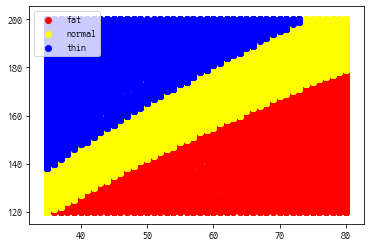

In [287]:
# bmi 시각화
tbl = pd.read_csv('../data/ml/bmi/bmi.csv', encoding = 'utf-8', index_col=2)
tbl.head()

# 그래프 객체 
fig = plt.figure()

# 서브플롯 생성

ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c=color, label=lbl)
    
scatter('fat','red')
scatter('normal','yellow')
scatter('thin','blue')
ax.legend()
plt.show()

#### 실습 4. olevetti 얼굴이미지 분류

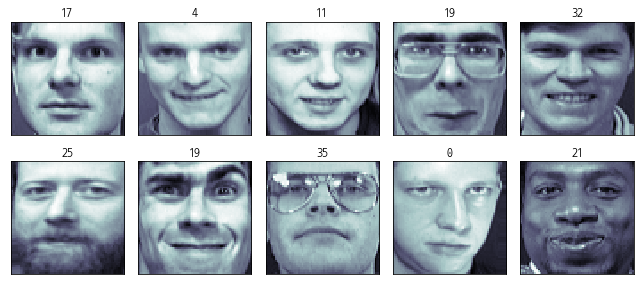

In [290]:
faces = datasets.fetch_olivetti_faces()

n = 2
m = 5
np.random.seed(0)
fig = plt.figure(figsize =(9,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0.05)
klist = np.random.choice(range(len(faces.data)),n*m)
for i in range(n):
    for j in range(m):
        k = klist[i*m+j]
        ax = fig.add_subplot(n,m,i*m+j+1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
        
plt.tight_layout()
plt.show()

In [294]:
x_train, x_test, y_train, y_test = train_test_split(faces.data,faces.target, test_size=0.25, random_state=0)

svm = SVC().fit(x_train, y_train)
print('훈련점수 : {:.3f}'.format(svm.score(x_train, y_train)))
print('검증점수 : {:.3f}'.format(svm.score(x_test, y_test)))



훈련점수 : 0.990
검증점수 : 0.860


훈련점수 : 1.000
검증점수 : 0.990


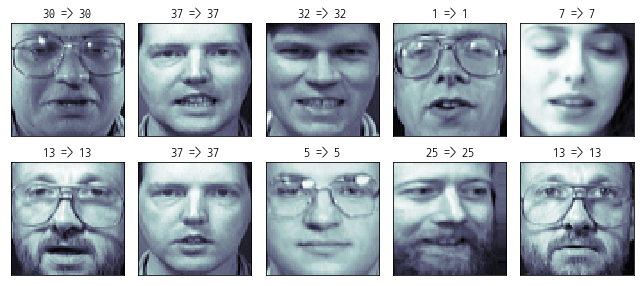

In [307]:
svm = SVC(kernel ='linear').fit(x_train, y_train)
print('훈련점수 : {:.3f}'.format(svm.score(x_train, y_train)))
print('검증점수 : {:.3f}'.format(svm.score(x_test, y_test)))

fig = plt.figure(figsize =(9,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0.05)
klist = np.random.choice(range(len(y_test)),n*m)
for i in range(n):
    for j in range(m):
        k = klist[i*m+j]
        ax = fig.add_subplot(n,m,i*m+j+1)
        ax.imshow(x_test[k:(k+1),:].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
        plt.title('%d => %d'%(y_test[k], svm.predict(x_test[k:(k+1),:])))
plt.tight_layout()
plt.show()

훈련점수 : 1.000
검증점수 : 0.990


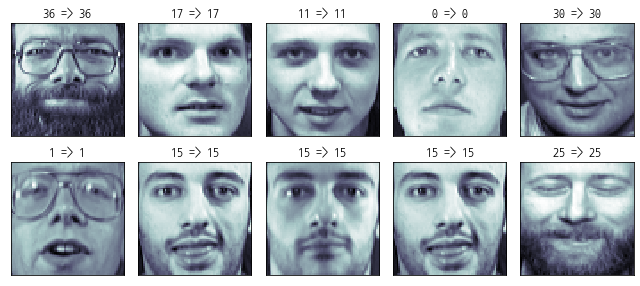

In [308]:
svm = SVC(kernel ='poly').fit(x_train, y_train)
print('훈련점수 : {:.3f}'.format(svm.score(x_train, y_train)))
print('검증점수 : {:.3f}'.format(svm.score(x_test, y_test)))

fig = plt.figure(figsize =(9,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0.05)
klist = np.random.choice(range(len(y_test)),n*m)
for i in range(n):
    for j in range(m):
        k = klist[i*m+j]
        ax = fig.add_subplot(n,m,i*m+j+1)
        ax.imshow(x_test[k:(k+1),:].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
        plt.title('%d => %d'%(y_test[k], svm.predict(x_test[k:(k+1),:])))
plt.tight_layout()
plt.show()

훈련점수 : 0.990
검증점수 : 0.860


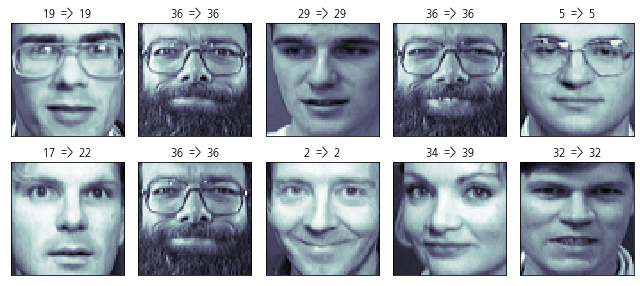

In [310]:
svm = SVC().fit(x_train, y_train)
print('훈련점수 : {:.3f}'.format(svm.score(x_train, y_train)))
print('검증점수 : {:.3f}'.format(svm.score(x_test, y_test)))

fig = plt.figure(figsize =(9,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0.05)
klist = np.random.choice(range(len(y_test)),n*m)
for i in range(n):
    for j in range(m):
        k = klist[i*m+j]
        ax = fig.add_subplot(n,m,i*m+j+1)
        ax.imshow(x_test[k:(k+1),:].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
        plt.title('%d => %d'%(y_test[k], svm.predict(x_test[k:(k+1),:])))
plt.tight_layout()
plt.show()

In [314]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
cl_report = metrics.classification_report(y_train, y_pred_train)
print(cl_report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         5
          15       0.88      1.00      0.93         7
          16       0.91      1.00      0.95        10
          17       1.00    

In [313]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
cl_report = metrics.classification_report(y_test, y_pred_test)
print(cl_report)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         0
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.60      1.00      0.75         3
          17       1.00      0.50      0.67         6
          19       1.00    